# Análise dos dados da Copa do Mundo FIFA
Com base na página sobre a Copa do Mundo FIFA na Wikipedia vamos obter os dados de público pagante em cada final

Link -> https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [3]:
# importando as bibliotecas
import pandas as pd
import requests

# url
url = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'

# requisitar a página e guardar a resposta
resposta = requests.get(url)

# obter a resposta em formato html
table = pd.read_html(resposta.text)

# exibir
table

[                                   Copa do Mundo FIFA                               Copa do Mundo FIFA.1
 0                                                 NaN                                                NaN
 1                                        Dados gerais                                       Dados gerais
 2                                         Organização          Federação Internacional de Futebol (FIFA)
 3                                             Edições                                              21[1]
 4                                    Local de disputa           País escolhido durante congresso da FIFA
 5                                             Sistema           Torneio concentradoGrupos e eliminatória
 6   Dados históricos  Primeiro vencedor Uruguai (1...  Dados históricos  Primeiro vencedor Uruguai (1...
 7                                    Dados históricos                                   Dados históricos
 8                                   Primeiro 

In [16]:
# queremos apenas a tabela com os pagantes por final
# essa é a 12ª tabela dos dados retornados
df = table[11]

df.head()

# caso a linha dos titulos venha como se fosse parte da tabela usar
# df.colums = df.iloc[0]
# df.drop(df.index[0], inplace=True) -> apagar a linha que ficou

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173
4,V,1954,Estádio Wankdorf,Berna,62


In [15]:
# vamos analisar os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Edição           21 non-null     object
 1   Ano              21 non-null     int64 
 2   Estádio          21 non-null     object
 3   Local            21 non-null     object
 4   Público pagante  21 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 968.0+ bytes


In [18]:
df['Público pagante'] = df['Público pagante'].astype(int)*1000

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Edição           21 non-null     object
 1   Ano              21 non-null     int64 
 2   Estádio          21 non-null     object
 3   Local            21 non-null     object
 4   Público pagante  21 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 968.0+ bytes


In [22]:
df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68000
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173000
4,V,1954,Estádio Wankdorf,Berna,62000


In [25]:
# construir um gráfico com a evolução do público pagante

# importar uma nova biblioteca
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# configurando o matplotlib
%matplotlib inline

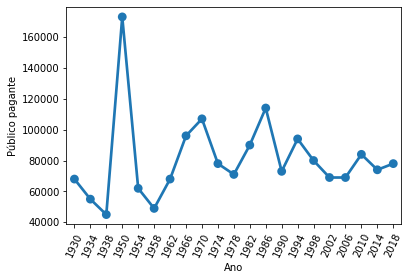

In [34]:
# exibir o gráfico de linhas
sns.pointplot(x='Ano', y='Público pagante', data=df)

# ajustando as legendas
plt.xticks(rotation=65)
plt.show()